In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [0]:
path = "./data/application_train.csv"
df = pd.read_csv(path)

In [0]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print(list(df.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

#### Check counts of each type of class/ target

In [0]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Clearly, the data is skewed in direction of target=0 or no-risk assignment

#### Attributes for calculating correlation

In [0]:
col_list = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
            'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
            'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
            'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
            'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
            'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
            'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
            'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
            'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
            'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
            'DEF_60_CNT_SOCIAL_CIRCLE']

In [0]:
df[col_list].corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,1.000000,0.096772,0.200754,0.207443,0.405302,0.472259,0.399500,0.406324,-0.651467,-0.299456,-0.389938,-0.465364,0.443153,0.754001,0.753922,0.176251,0.749838,0.194281,0.082961,0.536231,0.649044,0.649209,0.635934,0.041633,0.082622,0.074945,0.097904,0.192473,0.165568,0.663640,0.570930,0.597428,0.428986,0.450980,0.823257,0.838030,0.307107,0.266334,0.526878,0.543060,0.583577,0.367433,0.494708,0.393450,0.103046,0.191674,0.421309,0.440442,0.822283,0.839616,0.299642,0.257050,0.514120,0.539298,0.578382,0.359068,0.491768,0.385978,0.097301,0.180675,0.427873,0.450119,0.823116,0.838702,0.306460,0.264052,0.524903,0.541511,0.582069,0.367517,0.494880,0.392357,0.101392,0.188806,0.381729,0.183494,0.101849,0.182933,0.088418
TARGET,0.096772,1.000000,0.042006,0.028915,0.035716,0.065820,0.026356,0.035813,-0.078963,0.016768,-0.036434,-0.048815,0.121343,0.129562,0.129545,0.049149,0.128914,0.009862,0.008328,0.091006,0.144391,0.145578,0.092692,0.011620,0.016118,0.010784,0.058373,0.074806,0.052202,0.034447,-0.012730,-0.009126,0.051422,0.065902,0.151242,0.163542,0.042722,0.013529,0.083419,0.063460,0.090525,0.061954,0.076354,0.040549,0.015034,0.020471,0.051976,0.066168,0.151050,0.164141,0.043226,0.013787,0.082255,0.063309,0.090129,0.060955,0.076940,0.041483,0.015385,0.019554,0.051495,0.066273,0.151171,0.163753,0.042551,0.013414,0.083143,0.063346,0.090337,0.061469,0.076789,0.040757,0.015152,0.020230,0.038035,0.042428,0.052568,0.042282,0.048633
CNT_CHILDREN,0.200754,0.042006,1.000000,0.070739,0.129312,0.163102,0.124002,0.118895,-0.115513,-0.051993,-0.006359,-0.251955,0.214920,0.267125,0.267111,0.061804,0.265888,0.041214,0.036652,0.794518,0.248976,0.248939,0.207782,-0.007983,0.010921,0.017323,0.032344,0.077483,0.075866,0.246009,0.185909,0.214560,0.157813,0.181458,0.331275,0.373251,0.134739,0.098046,0.207826,0.207050,0.246800,0.150377,0.206552,0.146374,0.049096,0.075392,0.156045,0.177247,0.330875,0.373660,0.131747,0.095163,0.204100,0.205962,0.245240,0.147903,0.205934,0.144218,0.046381,0.071730,0.157538,0.180738,0.331168,0.373430,0.134765,0.097402,0.207002,0.206700,0.246500,0.150626,0.207152,0.145825,0.048574,0.074360,0.141480,0.084013,0.039153,0.083484,0.032752
AMT_INCOME_TOTAL,0.207443,0.028915,0.070739,1.000000,0.264972,0.305074,0.265790,0.207544,-0.249451,-0.121499,-0.132841,-0.181142,0.260262,0.277092,0.277022,0.033531,0.274715,0.073139,0.061822,0.197181,0.198998,0.196130,0.247286,0.042620,0.083883,0.077163,0.033597,0.061349,0.055155,0.238303,0.245700,0.203781,0.174256,0.164767,0.286200,0.714782,0.319033,0.129042,0.187102,0.228521,0.563840,0.120250,0.479200,0.167774,0

This is not visualisable because there are too many columns. We calculate correlation with target and print them. And for other attributes, we print pairwise correlation if it is greater than a certain threshold.

In [0]:
# Correlation of each variable with TARGET
corr_series = df.corrwith(df['TARGET'])

In [0]:
# print positive correlations in descending order
pos_corr = corr_series[corr_series>=0]
pos_corr.sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


In [0]:
# print negative correlations in ascending order (order of higher negative correlation)
pos_corr = corr_series[corr_series<0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(pos_corr.sort_values(ascending=True))

EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_1                   -0.155317
DAYS_EMPLOYED                  -0.044932
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG                 -0.029498
APARTMENTS_MEDI                -0.029184
FLAG_DOCUMENT_6                -0.028602
APARTMENTS_MODE                -0.027284
LIVINGAPARTMENTS

This analysis excludes non-numeric attributes. We first get all non-numeric categorical attributes from the data

In [0]:
# all columns
cols = df.columns
# numeric columns
num_cols = df._get_numeric_data().columns
# exclude numeric columns to get all non-numeric ones
non_num_col = list(set(cols) - set(num_cols))
non_num_col

['FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'HOUSETYPE_MODE',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_INCOME_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'CODE_GENDER']

#### Analysis of categorical variables with respect to TARGET

In [0]:
def get_ratio_of_positive_labels(df, attribute):
  """
  This function takes a dataframe and attribute and
  calculates the ratio of high-risk TARGET assignments (1)
  to the attribute
  """
  a = df.loc[df['TARGET']==1, attribute].value_counts()
  b = df.loc[df['TARGET']==0, attribute].value_counts()
  return a.divide(a.add(b))

In [0]:
get_ratio_of_positive_labels(df, 'CODE_GENDER')

F      0.069993
M      0.101419
XNA         NaN
Name: CODE_GENDER, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'OCCUPATION_TYPE')

Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.105788
Low-skill Laborers       0.171524
Managers                 0.062140
Medicine staff           0.067002
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096318
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: OCCUPATION_TYPE, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'NAME_EDUCATION_TYPE')

Secondary / secondary special    0.089399
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Academic degree                  0.018293
Name: NAME_EDUCATION_TYPE, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'NAME_HOUSING_TYPE')

House / apartment      0.077957
With parents           0.116981
Municipal apartment    0.085397
Rented apartment       0.123131
Office apartment       0.065724
Co-op apartment        0.079323
Name: NAME_HOUSING_TYPE, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'NAME_INCOME_TYPE')

Businessman                  NaN
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                      NaN
Unemployed              0.363636
Working                 0.095885
Name: NAME_INCOME_TYPE, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'NAME_FAMILY_STATUS')

Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                      NaN
Widow                   0.058242
Name: NAME_FAMILY_STATUS, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'FLAG_OWN_REALTY')

Y    0.079616
N    0.083249
Name: FLAG_OWN_REALTY, dtype: float64

In [0]:
# Binning age for analysis

df['DAYS_BIRTH_POS'] = df['DAYS_BIRTH'].abs()
#df['DAYS_BIRTH_POS'].describe()
bin_list = np.arange(df['DAYS_BIRTH_POS'].min(), df['DAYS_BIRTH_POS'].max()+10, 1825)
df['AGE_BIN'] = pd.cut(x=df['DAYS_BIRTH_POS'], bins=bin_list, labels=np.arange(20, 65, 5))

In [0]:
get_ratio_of_positive_labels(df, 'AGE_BIN')

20    0.121161
25    0.111546
30    0.100822
35    0.088501
40    0.077414
45    0.073847
50    0.065717
55    0.054664
60    0.052792
Name: AGE_BIN, dtype: float64

In [0]:
# Binning duration of employment for analysis --> also detect non-negative values for removal

df['DAYS_EMPLOYED_POS'] = df['DAYS_EMPLOYED']
df.DAYS_EMPLOYED_POS = np.where(df.DAYS_EMPLOYED_POS > 0, 0, df.DAYS_EMPLOYED_POS)
df['DAYS_EMPLOYED_POS'] = df['DAYS_EMPLOYED_POS'].abs()
bin_list = np.arange(df['DAYS_EMPLOYED_POS'].min(), df['DAYS_EMPLOYED_POS'].max()+10, 1825)
df['EMPLOYMENT_DURATION_BIN'] = pd.cut(x=df['DAYS_EMPLOYED_POS'], bins=bin_list, labels=np.arange(20, 65, 5))

In [0]:
get_ratio_of_positive_labels(df, 'EMPLOYMENT_DURATION_BIN')

20    0.105708
25    0.073714
30    0.057752
35    0.048484
40    0.047573
45    0.039903
50    0.041258
55    0.019231
60    0.004762
Name: EMPLOYMENT_DURATION_BIN, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'REGION_RATING_CLIENT')

0         NaN
1    0.049921
2    0.084809
3    0.121212
Name: REGION_RATING_CLIENT, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'REGION_RATING_CLIENT_W_CITY')

0         NaN
1    0.050070
2    0.085157
3    0.124696
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'CNT_CHILDREN')

0     0.063382
1     0.089567
2     0.087047
3     0.096996
4     0.130435
5     0.074074
6     0.315789
7          NaN
8          NaN
9          inf
10         NaN
11         inf
12         NaN
14         NaN
19         NaN
Name: CNT_CHILDREN, dtype: float64

In [0]:
get_ratio_of_positive_labels(df, 'OBS_30_CNT_SOCIAL_CIRCLE')

0.0      0.059800
1.0      0.086062
2.0      0.088689
3.0      0.087872
4.0      0.093798
5.0      0.087708
6.0      0.095877
7.0      0.103903
8.0      0.089330
9.0      0.099138
10.0     0.097403
11.0     0.100437
12.0     0.105660
13.0     0.127329
14.0     0.110048
15.0     0.074074
16.0     0.090000
17.0     0.069444
18.0     0.027778
19.0     0.081081
20.0     0.125000
21.0          NaN
22.0     0.166667
23.0     0.166667
24.0          NaN
25.0     0.142857
26.0          NaN
27.0          NaN
29.0          NaN
30.0     0.500000
47.0          NaN
348.0         NaN
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### For similar income range and credit range, is there bias among groups?

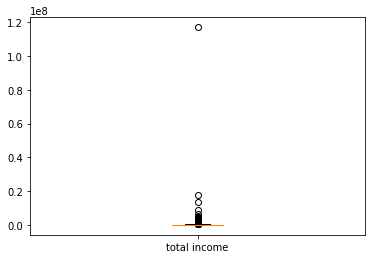

In [0]:
# Plot boxplot of total income
fig = plt.figure(1, figsize=(6, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot([df['AMT_INCOME_TOTAL']], labels=['total income'])
plt.show()
# Conclusion: Use median for analysis

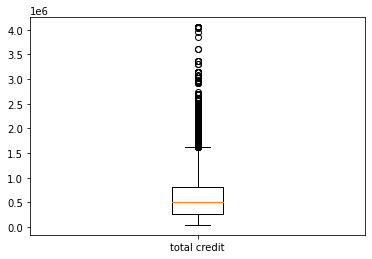

In [0]:
# Plot boxplot of total credit
fig = plt.figure(1, figsize=(6, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot([df['AMT_CREDIT']], labels=['total credit'])
plt.show()
# Conclusion: use median for analysis

In [0]:
# get stats for income and credit
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [0]:
# Find cases where people above 25% quartile income are marked risk for credit below 25% quartile

df_filtered = df[(df.AMT_INCOME_TOTAL >= 85500) & (df.AMT_CREDIT <= 180000) & (df.TARGET==1)]
print(df_filtered['CODE_GENDER'].value_counts())
print(df_filtered['AGE_BIN'].value_counts())
print(df_filtered['OCCUPATION_TYPE'].value_counts())
print(df_filtered['NAME_EDUCATION_TYPE'].value_counts())

F    764
M    715
Name: CODE_GENDER, dtype: int64
25    313
20    280
30    277
35    201
40    152
45    130
50     78
55     37
60      9
Name: AGE_BIN, dtype: int64
Laborers                 419
Sales staff              215
Drivers                  132
Core staff               119
Managers                  62
High skill tech staff     58
Security staff            53
Cooking staff             48
Low-skill Laborers        35
Medicine staff            29
Cleaning staff            28
Accountants               21
Private service staff     13
Waiters/barmen staff       7
Secretaries                6
HR staff                   3
Realty agents              3
Name: OCCUPATION_TYPE, dtype: int64
Secondary / secondary special    1167
Higher education                  225
Incomplete higher                  71
Lower secondary                    16
Name: NAME_EDUCATION_TYPE, dtype: int64


In [0]:
# Find cases where people above median income are marked risk for credit below 25% quartile

df_filtered = df[(df.AMT_INCOME_TOTAL >= 135000) & (df.AMT_CREDIT <= 180000) & (df.TARGET==1)]
print(df_filtered['CODE_GENDER'].value_counts())
print(df_filtered['AGE_BIN'].value_counts())
print(df_filtered['OCCUPATION_TYPE'].value_counts())
print(df_filtered['NAME_EDUCATION_TYPE'].value_counts())

M    407
F    317
Name: CODE_GENDER, dtype: int64
30    143
25    143
20    124
35    107
40     74
45     73
50     34
55     19
60      6
Name: AGE_BIN, dtype: int64
Laborers                 227
Sales staff               82
Drivers                   80
Core staff                52
Managers                  47
High skill tech staff     26
Security staff            25
Cooking staff             14
Medicine staff            13
Cleaning staff            10
Accountants               10
Low-skill Laborers         9
Private service staff      8
Waiters/barmen staff       4
Realty agents              3
Secretaries                3
HR staff                   2
Name: OCCUPATION_TYPE, dtype: int64
Secondary / secondary special    540
Higher education                 141
Incomplete higher                 34
Lower secondary                    9
Name: NAME_EDUCATION_TYPE, dtype: int64


In [0]:
# Find cases where people above 75% quartile income are marked risk for credit below 25% quartile

df_filtered = df[(df.AMT_INCOME_TOTAL >= 202500) & (df.AMT_CREDIT <= 180000) & (df.TARGET==1)]
print(df_filtered['CODE_GENDER'].value_counts())
print(df_filtered['AGE_BIN'].value_counts())
print(df_filtered['OCCUPATION_TYPE'].value_counts())
print(df_filtered['NAME_EDUCATION_TYPE'].value_counts())

M    111
F     79
Name: CODE_GENDER, dtype: int64
30    42
25    34
40    27
35    25
20    21
45    19
50    12
55     9
60     1
Name: AGE_BIN, dtype: int64
Laborers                 61
Managers                 20
Drivers                  18
Sales staff              17
Core staff               16
High skill tech staff     6
Security staff            6
Medicine staff            4
Cleaning staff            4
Secretaries               2
Accountants               2
Private service staff     2
Cooking staff             2
Low-skill Laborers        2
Realty agents             1
Waiters/barmen staff      1
Name: OCCUPATION_TYPE, dtype: int64
Secondary / secondary special    130
Higher education                  51
Incomplete higher                  7
Lower secondary                    2
Name: NAME_EDUCATION_TYPE, dtype: int64


### Distribution of attributes with respect to risk

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DAYS_BIRTH_POS, dtype: object

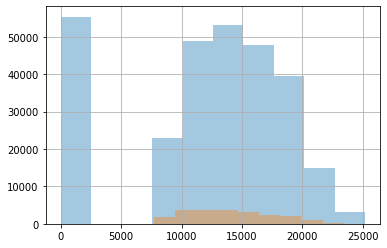

In [0]:
df[['DAYS_BIRTH_POS', 'TARGET']].groupby('TARGET').DAYS_BIRTH_POS.hist(alpha=0.4)

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE_BIN, dtype: object

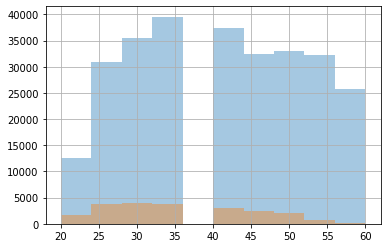

In [0]:
df[['AGE_BIN', 'TARGET']].groupby('TARGET').AGE_BIN.hist(alpha=0.4)

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AMT_INCOME_TOTAL, dtype: object

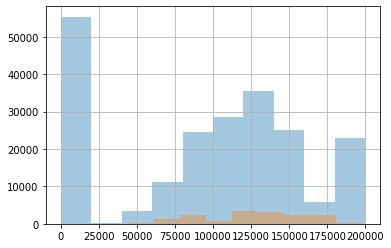

In [0]:
df[['AMT_INCOME_TOTAL', 'TARGET']][df['AMT_INCOME_TOTAL']<200000].groupby('TARGET').AMT_INCOME_TOTAL.hist(alpha=0.4)

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE_BIN, dtype: object

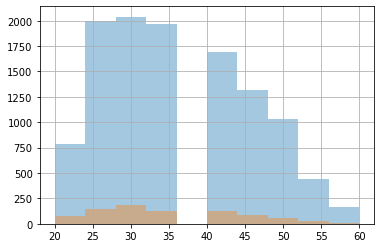

In [0]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET', 'AGE_BIN']][df['AMT_INCOME_TOTAL']>df['AMT_CREDIT']].groupby('TARGET').AGE_BIN.hist(alpha=0.4)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

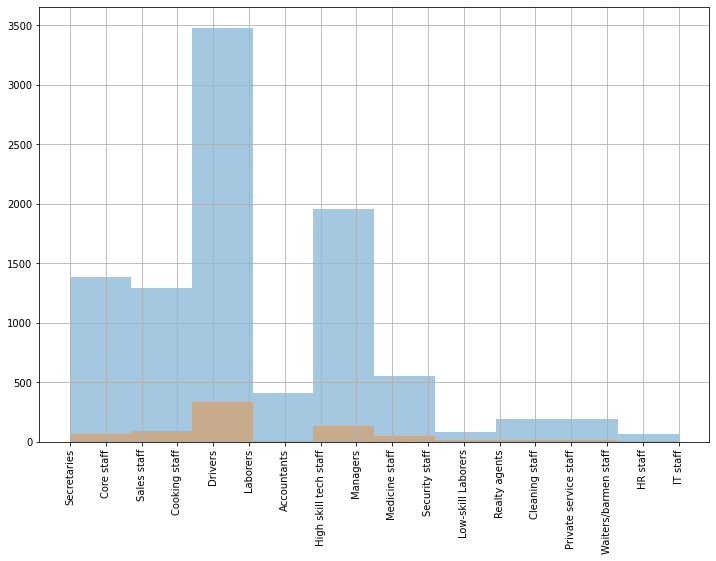

In [0]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET', 'OCCUPATION_TYPE']][df['AMT_INCOME_TOTAL']>df['AMT_CREDIT']].groupby('TARGET').OCCUPATION_TYPE.hist(alpha=0.4, figsize=(12,8))
plt.xticks(rotation='vertical')